<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/108_DOE_2_a_5___2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023**

# **Parte I: Experimento $2^{5-2}$ fraccion positiva I=ABD y I=ACE - Ejemplo, pág. 199**
## **1. Ejemplo integrador**
*En una planta donde se fabrican semiconductores se quiere mejorar el rendimiento del proceso vía diseño de experimentos. De acuerdo con la experiencia del grupo de mejora, los factores que podrían tener mayor influencia sobre la variable de respuesta (rendimiento), así como los niveles de prueba utilizados son los siguientes:*
- A = Nivel de la abertura (pequeña, grande) = (-1,1).
- B = Tiempo de exposición (20% abajo, 20% arriba)= (-1,1).
- C = Tiempo de revelado (30 seg, 45 seg)= (-1,1).
- D = Dimensión de la máscara (pequeña, grande)= (-1,1).
- E = Tiempo de grabado (14.5 min, 15.5 min)= (-1,1).

*Se decide correr un experimento 25 con una sola corrida o réplica para estudiar estos cinco factores. Se hacen las 32 corridas a nivel proceso.*


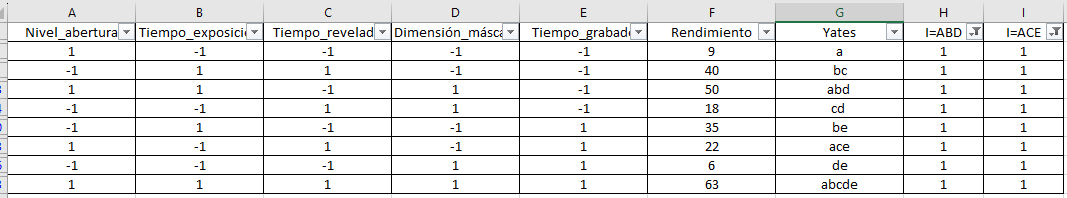


## **2. Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Datos**

In [2]:
data = {
    'Nivel_abertura':     [1,  -1,  1, -1,  -1, 1, -1,  1],
    'Tiempo_exposición':  [-1,  1, 1,  -1, 1, -1, -1,  1],
    'Tiempo_revelado':    [-1, 1,  -1,  1, -1, 1,  -1,  1],
    'Dimensión_máscara':  [-1, -1, 1, 1,  -1,  -1,  1,  1],
    'Tiempo_grabado':     [-1, -1, -1, -1, 1, 1, 1, 1],
    'rendimiento':        [9,  40,  50, 18, 35, 22, 6, 63]
}


## **4. Nuestro DataFrame**

In [3]:
datos = pd.DataFrame(data)
print(datos)


   Nivel_abertura  Tiempo_exposición  Tiempo_revelado  Dimensión_máscara  \
0               1                 -1               -1                 -1   
1              -1                  1                1                 -1   
2               1                  1               -1                  1   
3              -1                 -1                1                  1   
4              -1                  1               -1                 -1   
5               1                 -1                1                 -1   
6              -1                 -1               -1                  1   
7               1                  1                1                  1   

   Tiempo_grabado  rendimiento  
0              -1            9  
1              -1           40  
2              -1           50  
3              -1           18  
4               1           35  
5               1           22  
6               1            6  
7               1           63  


## **5. Cálculo de los Efectos principales**

In [6]:
import pandas as pd
import statsmodels.api as sm

# Crear el modelo de regresión lineal
X = datos[['Nivel_abertura', 'Tiempo_exposición', 'Tiempo_revelado', 'Dimensión_máscara', 'Tiempo_grabado']]
X = sm.add_constant(X)  # Agregar una constante para el término independiente
y = datos['rendimiento']
model = sm.OLS(y, X).fit()

# Obtener los coeficientes de regresión (efectos principales)
effects = model.params[1:]
print(effects)


Nivel_abertura        5.625
Tiempo_exposición    16.625
Tiempo_revelado       5.375
Dimensión_máscara     3.875
Tiempo_grabado        1.125
dtype: float64


## **5. Grafico de los Efectos principales**
## **a. Sin el valor de los efectos**

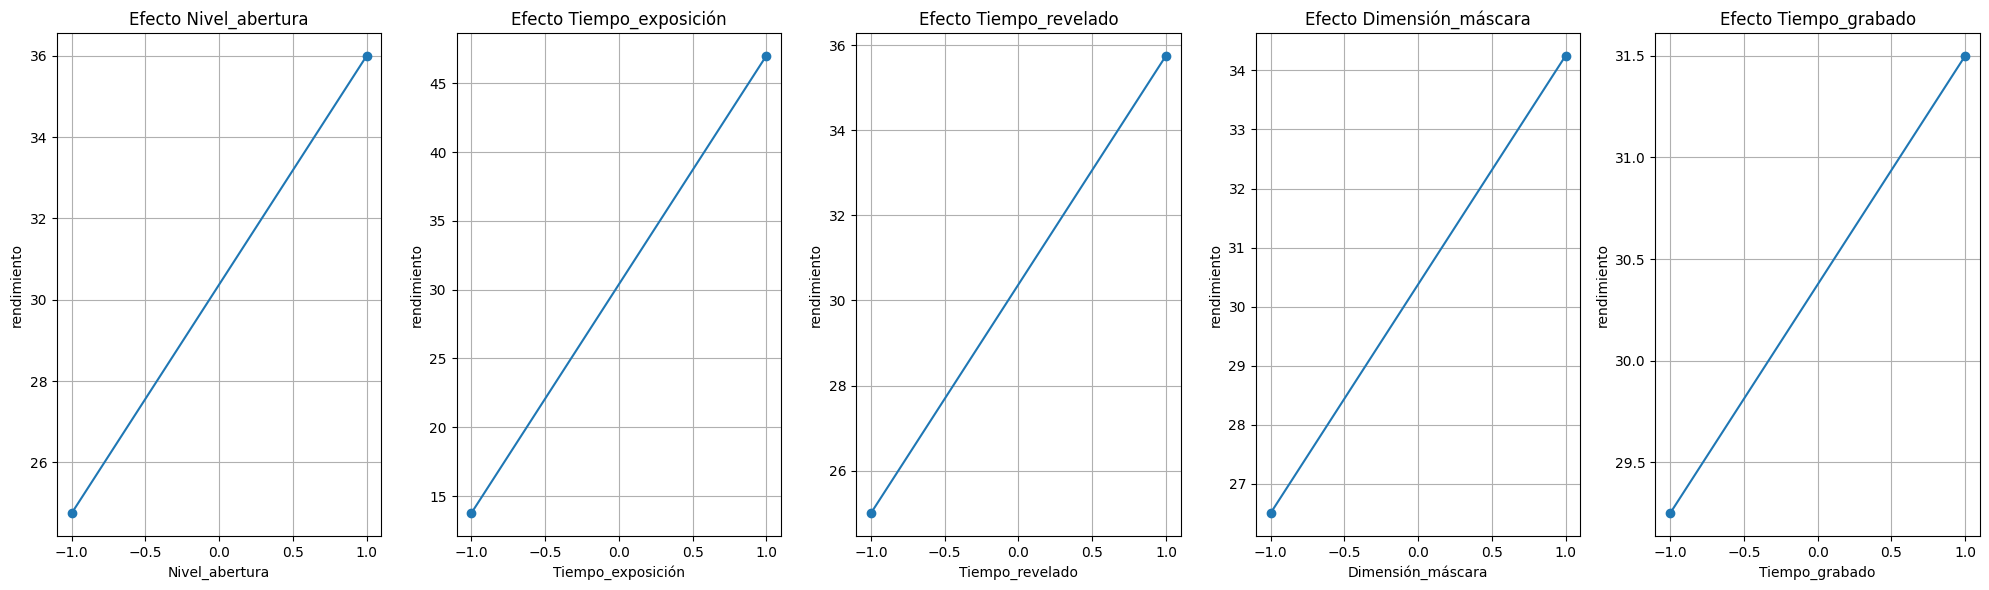

In [17]:

# Crear gráficos de efectos principales para cada factor en una sola fila
factors = datos.columns[:-1]  # Excluyendo la columna 'media' y 'desviacion

fig, axes = plt.subplots(1, len(factors), figsize=(20, 6))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'rendimiento']].groupby(factor).mean()
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('rendimiento')
    ax.set_title(f'Efecto {factor}')
    ax.grid(True)

plt.tight_layout()
plt.show()

## **b. Con el valor de los efectos**

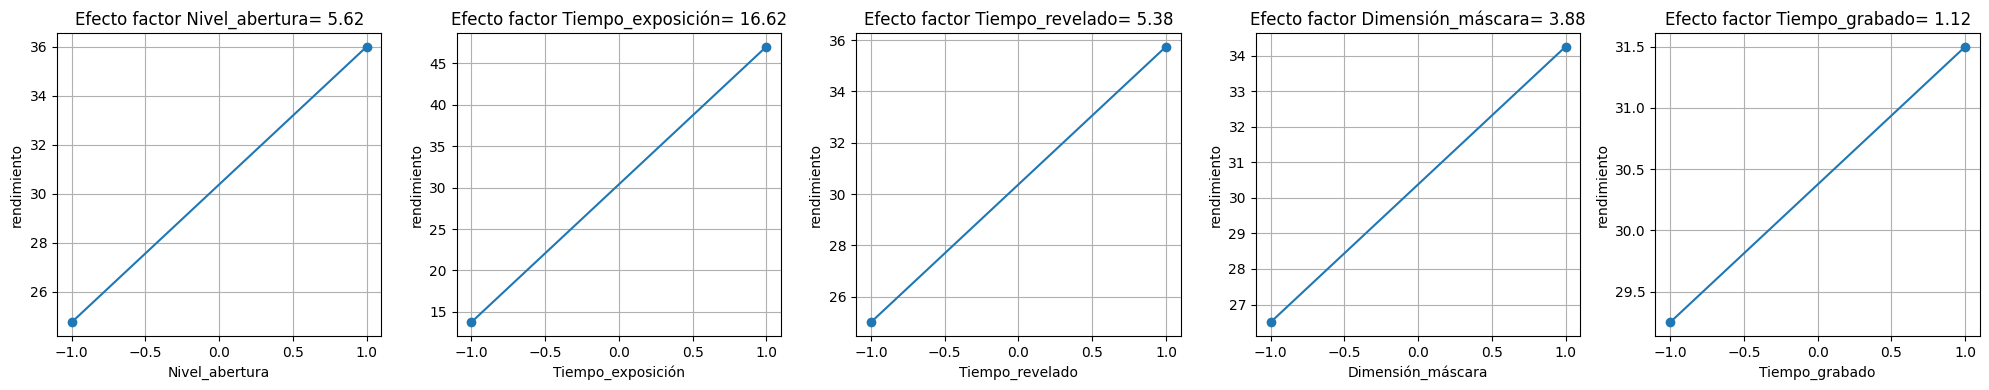

In [19]:
import matplotlib.pyplot as plt

factors = datos.columns[:-1]  # Excluyendo la columna 'rendimiento'

fig, axes = plt.subplots(1, len(factors), figsize=(20, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'rendimiento']].groupby(factor).mean()
    effect_value = (df_effect.loc[1, 'rendimiento'] - df_effect.loc[-1, 'rendimiento'])/2  # Cálculo del efecto
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('rendimiento')
    ax.set_title(f'Efecto factor {factor}= {effect_value:.2f}')
    ax.grid(True)

plt.tight_layout()
plt.show()


# **6. Box_PLot**

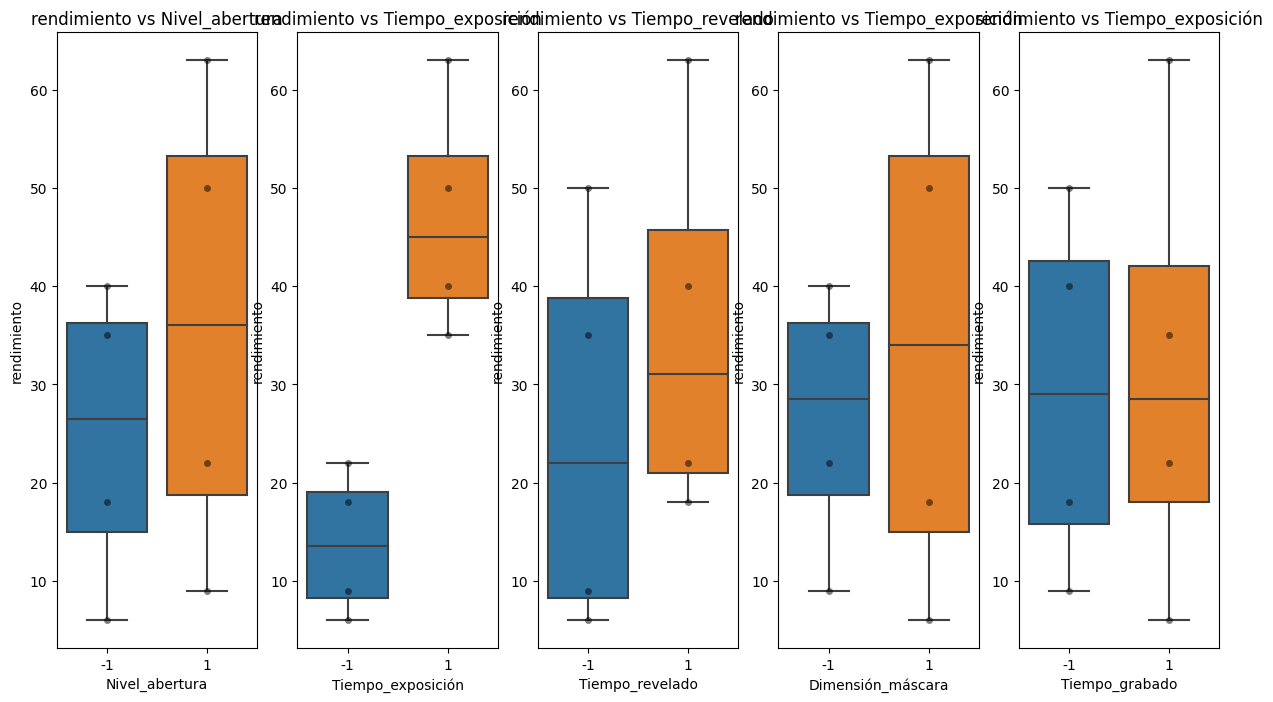

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(15, 8))
axs[0].set_title('rendimiento vs Nivel_abertura')
sns.boxplot(x="Nivel_abertura", y="rendimiento", data=datos, ax=axs[0])
sns.swarmplot(x="Nivel_abertura", y="rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('rendimiento vs Tiempo_exposición')
sns.boxplot(x="Tiempo_exposición", y="rendimiento", data=datos, ax=axs[1])
sns.swarmplot(x="Tiempo_exposición", y="rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('rendimiento vs Tiempo_revelado')
sns.boxplot(x="Tiempo_revelado", y="rendimiento", data=datos, ax=axs[2])
sns.swarmplot(x="Tiempo_revelado", y="rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('rendimiento vs Tiempo_exposición')
sns.boxplot(x="Dimensión_máscara", y="rendimiento", data=datos, ax=axs[3])
sns.swarmplot(x="Dimensión_máscara", y="rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[3])
axs[4].set_title('rendimiento vs Tiempo_exposición')
sns.boxplot(x="Tiempo_grabado", y="rendimiento", data=datos, ax=axs[4])
sns.swarmplot(x="Tiempo_grabado", y="rendimiento", data=datos, color='black',
              alpha = 0.5, ax=axs[4]);

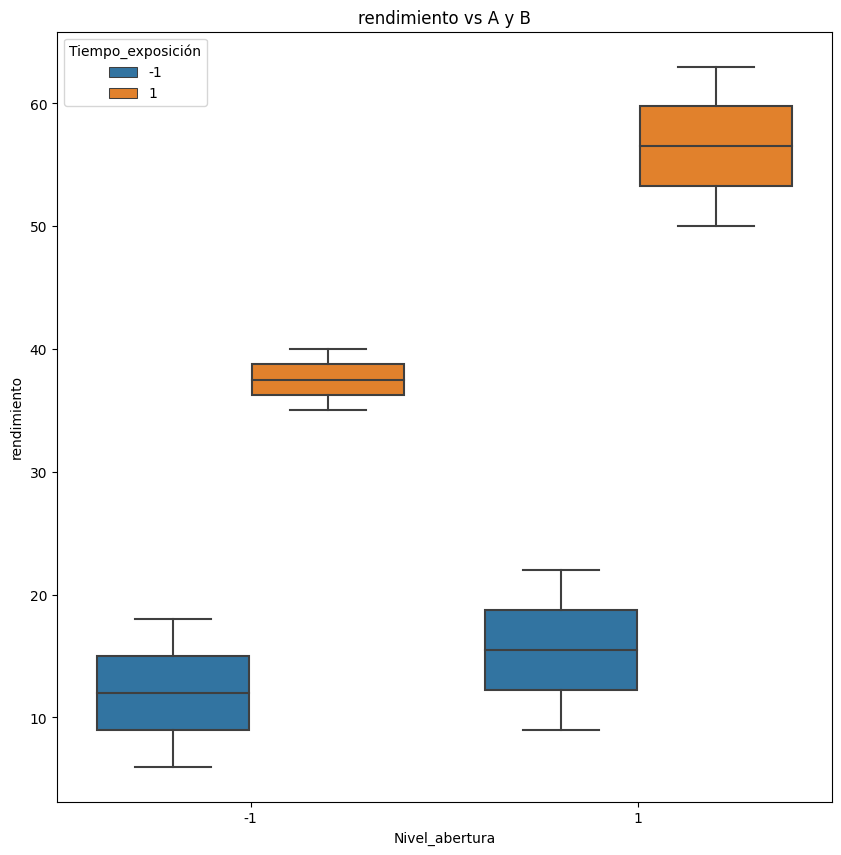

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('rendimiento vs A y B')
sns.boxplot(x="Nivel_abertura", y="rendimiento", hue='Tiempo_exposición', data=datos,
             ax=ax);

<Axes: title={'center': 'rendimiento vs A y C'}, xlabel='Nivel_abertura', ylabel='rendimiento'>

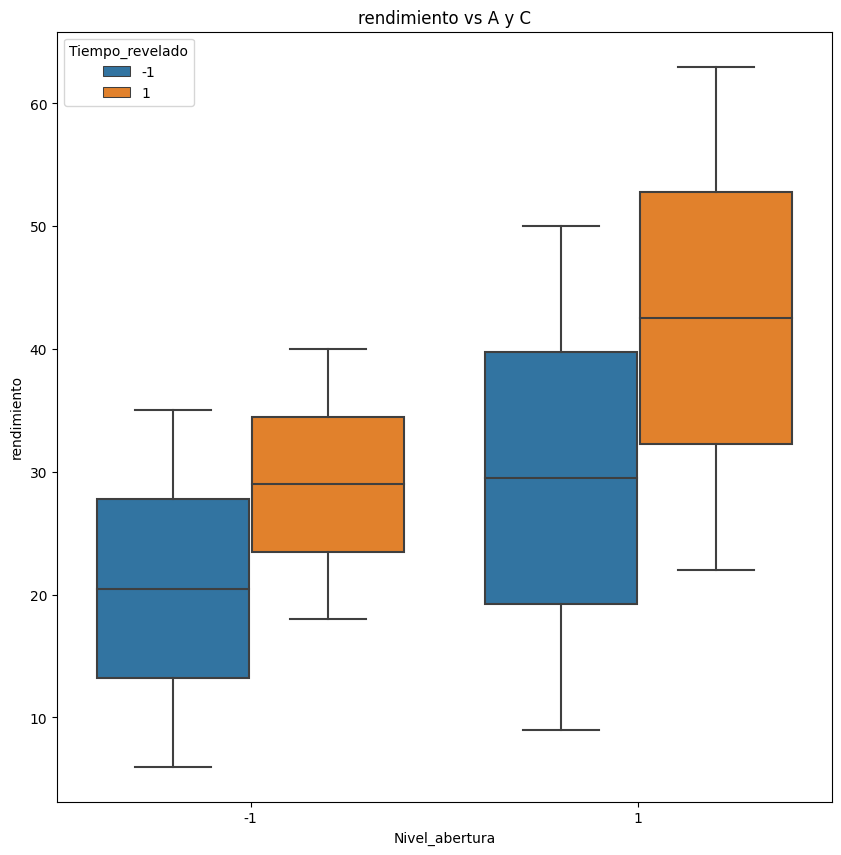

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('rendimiento vs A y C')
sns.boxplot(x="Nivel_abertura", y="rendimiento", hue='Tiempo_revelado',data=datos,               ax=ax)

# **7. Graficos de interacción**

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

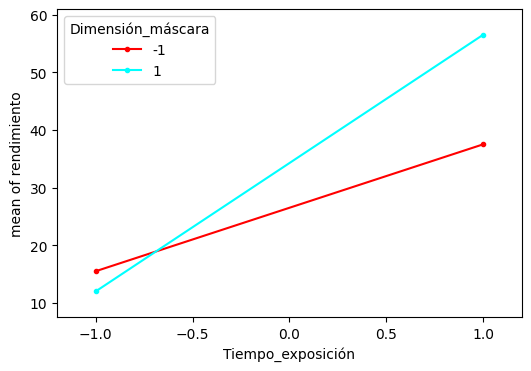

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Tiempo_exposición,
    trace    = datos.Dimensión_máscara,
    response = datos.rendimiento,
    ax       = ax,
)

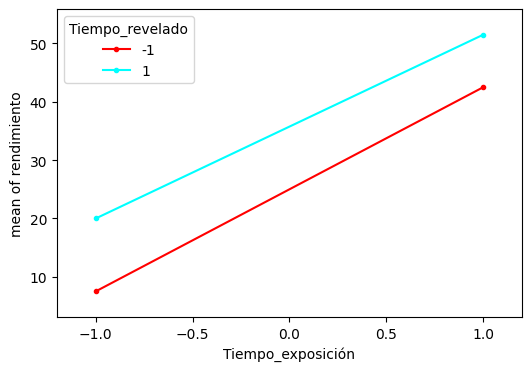

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Tiempo_exposición,
    trace    = datos.Tiempo_revelado,
    response = datos.rendimiento,
    ax       = ax,
)

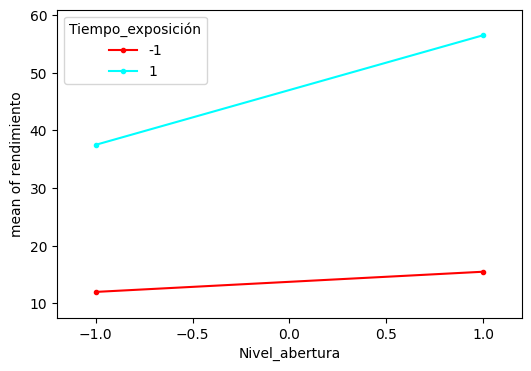

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Nivel_abertura,
    trace    = datos.Tiempo_exposición,
    response = datos.rendimiento,
    ax       = ax,
)

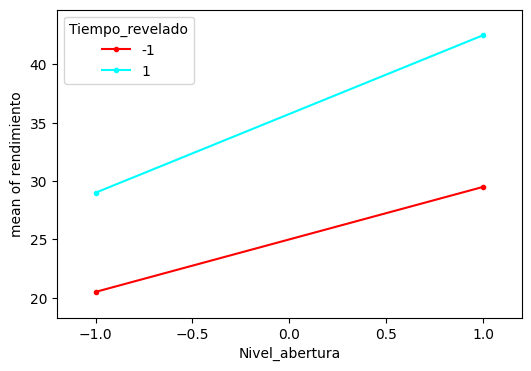

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Nivel_abertura,
    trace    = datos.Tiempo_revelado,
    response = datos.rendimiento,
    ax       = ax,
)

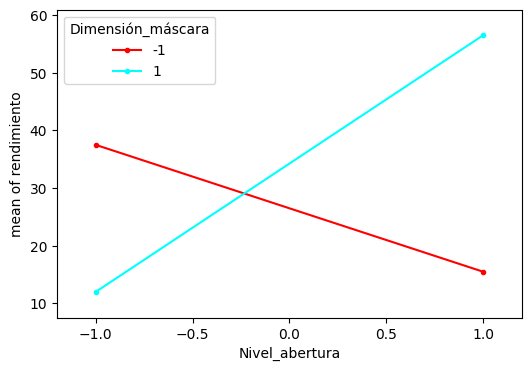

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Nivel_abertura,
    trace    = datos.Dimensión_máscara,
    response = datos.rendimiento,
    ax       = ax,
)

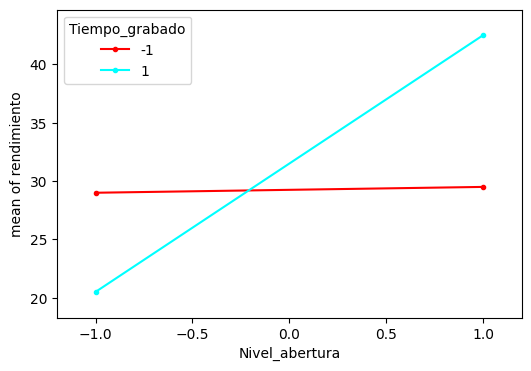

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Nivel_abertura,
    trace    = datos.Tiempo_grabado,
    response = datos.rendimiento,
    ax       = ax,
)

# **8. No es posible el anova con todos los efectos - Los Efectos de Orden 3 en adelante no son significativos**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **a. Anova con los Efectos Principales y las Interacciones Dobles**

In [ ]:
modelo1 = ols("rendimiento ~ (Nivel_abertura+Tiempo_exposición+Tiempo_revelado+Dimensión_máscara+Tiempo_grabado)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

ValueError: ignored

In [ ]:
modelo2 = sm.OLS.from_formula('rendimiento ~ (Nivel_abertura+Tiempo_exposición+Tiempo_revelado+Dimensión_máscara+Tiempo_grabado)**2', data=datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:            rendimiento   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 17 Oct 2023   Prob (F-statistic):                nan
Time:                        14:07:33   Log-Likelihood:                 242.52
No. Observations:                   8   AIC:                            -469.0
Df Residuals:                       0   BIC:                            -468.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# **b. Efectos Principales despues de Colapsar los Factores E y D**

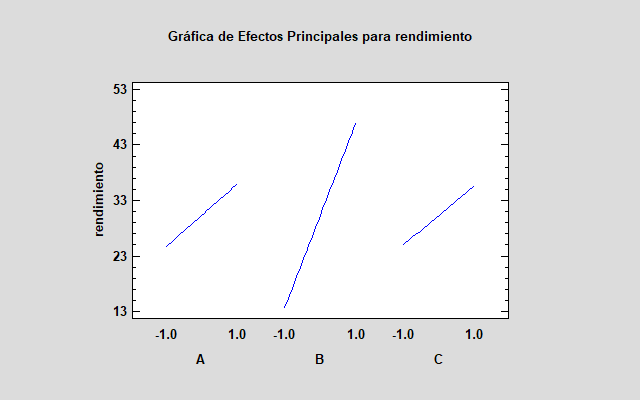

# **c. Interacciones Dobles despues de Colapsar los Factores E y D**

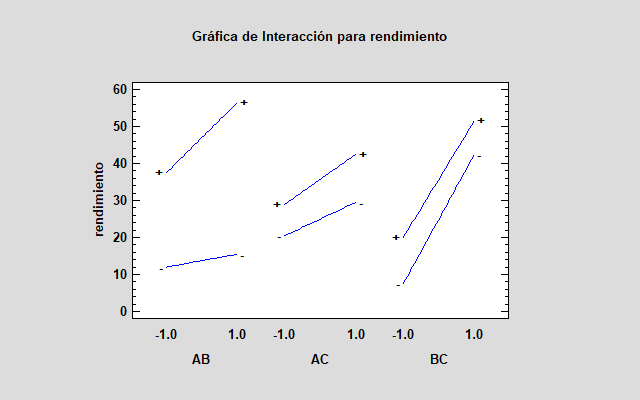

# **9. El anova con todos los efectos - Colapsando el Factor E**

In [ ]:
modelo3 = ols("rendimiento ~ (Nivel_abertura+Tiempo_exposición+Tiempo_revelado+Dimensión_máscara)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo3, typ=1)
print (anova_result)

ValueError: ignored

# **10. El anova con todos los efectos - Colapsando otro Factor - el Factor D**

In [ ]:
modelo4 = ols("rendimiento ~ (Nivel_abertura+Tiempo_exposición+Tiempo_revelado)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo4, typ=1)
print (anova_result)

                                    df    sum_sq   mean_sq           F  \
Nivel_abertura                     1.0   253.125   253.125   41.326531   
Tiempo_exposición                  1.0  2211.125  2211.125  361.000000   
Tiempo_revelado                    1.0   231.125   231.125   37.734694   
Nivel_abertura:Tiempo_exposición   1.0   120.125   120.125   19.612245   
Nivel_abertura:Tiempo_revelado     1.0    10.125    10.125    1.653061   
Tiempo_exposición:Tiempo_revelado  1.0     6.125     6.125    1.000000   
Residual                           1.0     6.125     6.125         NaN   

                                     PR(>F)  
Nivel_abertura                     0.098242  
Tiempo_exposición                  0.033475  
Tiempo_revelado                    0.102735  
Nivel_abertura:Tiempo_exposición   0.141382  
Nivel_abertura:Tiempo_revelado     0.420833  
Tiempo_exposición:Tiempo_revelado  0.500000  
Residual                                NaN  


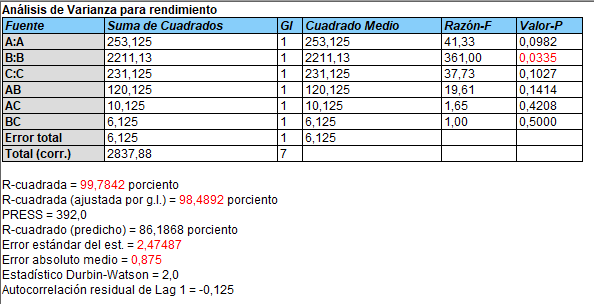

# **11. Encontrando el óptimo**

In [ ]:
modelo4.params

Intercept                            30.375
Nivel_abertura                        5.625
Tiempo_exposición                    16.625
Tiempo_revelado                       5.375
Nivel_abertura:Tiempo_exposición      3.875
Nivel_abertura:Tiempo_revelado        1.125
Tiempo_exposición:Tiempo_revelado    -0.875
dtype: float64

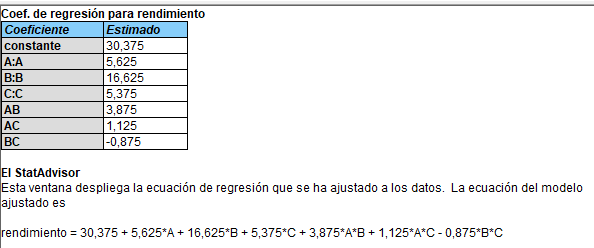

In [ ]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, b1, b2, b3, b12, b13, b23= modelo4.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b12',b12],
           ['b13',b13],
           ['b23',b23]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.375                       |
+----------------+------------------------------+
| b1             | 5.625                        |
+----------------+------------------------------+
| b2             | 16.625                       |
+----------------+------------------------------+
| b3             | 5.375                        |
+----------------+------------------------------+
| b12            | 3.875                        |
+----------------+------------------------------+
| b13            | 1.125                        |
+----------------+------------------------------+
| b23            | -0.875                       |
+----------------+------------------------------+


In [ ]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+b1*x[0] + b2*x[1] + b3*x[2] + b12*x[0]*x[1] + b13*x[0]*x[2] + b23*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la salida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", res.x)
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1. 1. 1.]
Valor Máximo: 62.12499999998945


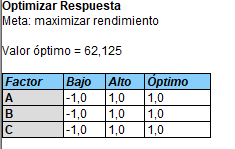

# **12. El Mejor Anova con  los efectos significativos**
+ **Como se observa AC y BC no son significativos**

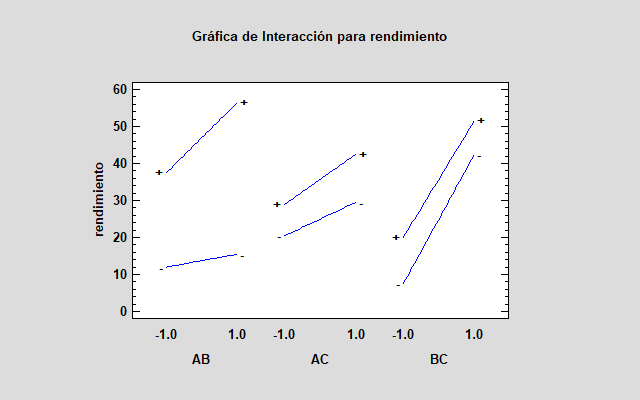

In [ ]:
modelo5 = sm.OLS.from_formula('rendimiento ~ (Nivel_abertura + Tiempo_exposición)**2 +   Tiempo_revelado', data=datos).fit()
print(modelo5.summary())

                            OLS Regression Results                            
Dep. Variable:            rendimiento   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     94.37
Date:                Tue, 17 Oct 2023   Prob (F-statistic):            0.00174
Time:                        14:19:43   Log-Likelihood:                -15.466
No. Observations:                   8   AIC:                             40.93
Df Residuals:                       3   BIC:                             41.33
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
modelo6 = ols("rendimiento ~ (Nivel_abertura + Tiempo_exposición)**2 + Tiempo_revelado", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo6, typ=1)
print (anova_result)

                                   df    sum_sq      mean_sq           F  \
Nivel_abertura                    1.0   253.125   253.125000   33.938547   
Tiempo_exposición                 1.0  2211.125  2211.125000  296.463687   
Nivel_abertura:Tiempo_exposición  1.0   120.125   120.125000   16.106145   
Tiempo_revelado                   1.0   231.125   231.125000   30.988827   
Residual                          3.0    22.375     7.458333         NaN   

                                    PR(>F)  
Nivel_abertura                    0.010073  
Tiempo_exposición                 0.000427  
Nivel_abertura:Tiempo_exposición  0.027767  
Tiempo_revelado                   0.011439  
Residual                               NaN  


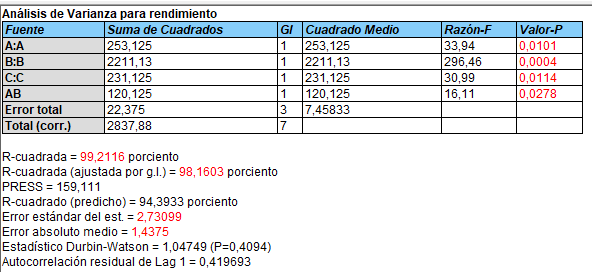

# **13.0 Los Efectos significativos de interacción**

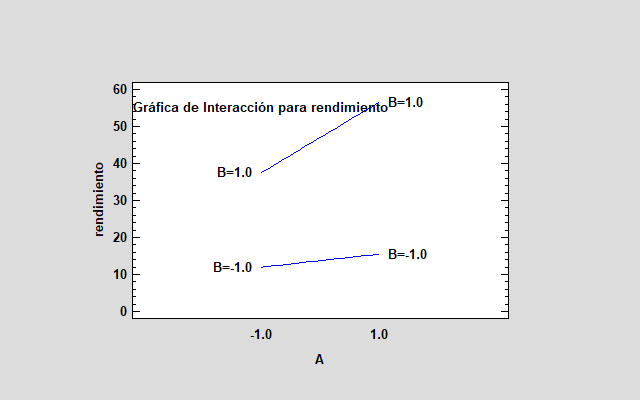

# **14. Los valores de $β_{ij}$ para el modelo5**

In [ ]:
modelo5.params

Intercept                           30.375
Nivel_abertura                       5.625
Tiempo_exposición                   16.625
Nivel_abertura:Tiempo_exposición     3.875
Tiempo_revelado                      5.375
dtype: float64

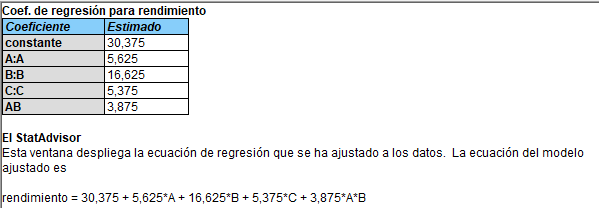

In [ ]:
#!pip install texttable &>/dev/null
from texttable import Texttable
t2 = Texttable()
b0, b1, b2, b3, b12= modelo5.params
# Tabla Resumen

t2.add_rows([['Parametro = bi','valor de bi para el modelo 2' ],
           ['b0',	b0],
           ['b1',	b1],
           ['b2',	b2],
           ['b3',	b3],
           ['b12',b12]])
print(t2.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 2 |
+================+==============================+
| b0             | 30.375                       |
+----------------+------------------------------+
| b1             | 5.625                        |
+----------------+------------------------------+
| b2             | 16.625                       |
+----------------+------------------------------+
| b3             | 3.875                        |
+----------------+------------------------------+
| b12            | 5.375                        |
+----------------+------------------------------+


In [ ]:
print(f'El Modelo estimado es ')
print(f'rendimiento = f(x,y,z)= {round(b0,2)}+{round(b1,2)}x+{round(b2,2)}y+{round(b3,2)}z+{round(b12,2)}xy')

El Modelo estimado es 
rendimiento = f(x,y,z)= 30.37+5.62x+16.63y+3.87z+5.37xy


# **15. Maximizando el rendimiento**

In [ ]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0 + b1*x[0] + b2*x[1] +b3*x[2] + b12*x[0]*x[1])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la salida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", res.x)
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1. 1. 1.]
Valor Máximo: 61.87499999997829


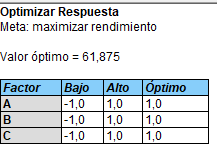